In [ ]:
Penjelasan crisp dm

1. Business Understanding
Indonesia adalah negara yang kaya akan hasil pangan nya, terutama dalam produksi padi.
Terutama Sumatra memiliki banyak produksi padi di setiap provinsi, produksi yang lainnya
ada jagung, kacang tanah, ubi jalar, dan produksi lainnya.
Tapi yang paling dominan adalah padi.
Sumatra sangat rentan terhadap perubahan iklim, dan dampak negatif bagi tanaman padi adalah
pola tanam,waktu panen, jumlah produksi dan kualitas.

Untuk itu disini saya akan mencoba analisis 
prediksi jumlah produksi tanaman padi di Sumatera

Dataset ini didapatkan dari kaggle "https://www.kaggle.com/datasets/ardikasatria/datasettanamanpadisumatera"

2. Data Understanding
Banyak Parameter yang ada yang memberikan pengaruh terhadap Jumlah Produksi,
Seperti Luas panen yang dimiliki,peningkatan suhu bumi akibat dampak pemanasan global, penguapan, 
aliran air, kelembaban tanah, dan variasi iklim seperti curah hujan. 

Data yang terdapat dalam dataset padi.csv 
Provinsi, Tahun, Produksi, Luas Panen, Curah hujan, Kelembapan, Suhu Rata Rata

3. DATA PREPARATION
Tahap ini sebelum masuk ke model, pemisahan data harus dilakukan, dan data disesuaikan dengan kebutuhan.
lalu menentukan x dan y, setelah dilakukan data yg dipilih yaitu

x = LuasPanen,Curahhujan,Kelembapan,SuhuRataRata
y = Produksi

data  hanya dipilih yang datanya numerik karena menggunakan metode regresi linear

4. Modelling
Untuk prediksi jumlah produksi ini menggunakan metode algoritma regression linear

5. Evaluation
Setelah model diterapkan, maka memprediksi tingkat ke akurasian, agar bisa dipakai dan dipercaya.

6. Deployment
Tahap terakhir yaitu deployment, ke streamlit dan github.

# deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [7]:
df = pd.read_csv('padi.csv')

# Deskripsi Dataset

In [8]:
df.head()

,Provinsi,Tahun,Produksi,LuasPanen,Curahhujan,Kelembapan,SuhuRataRata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Provinsi      224 non-null    object 
 1   Tahun         224 non-null    int64  
 2   Produksi      224 non-null    float64
 3   LuasPanen     224 non-null    float64
 4   Curahhujan    224 non-null    float64
 5   Kelembapan    224 non-null    float64
 6   SuhuRataRata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


<Axes: >

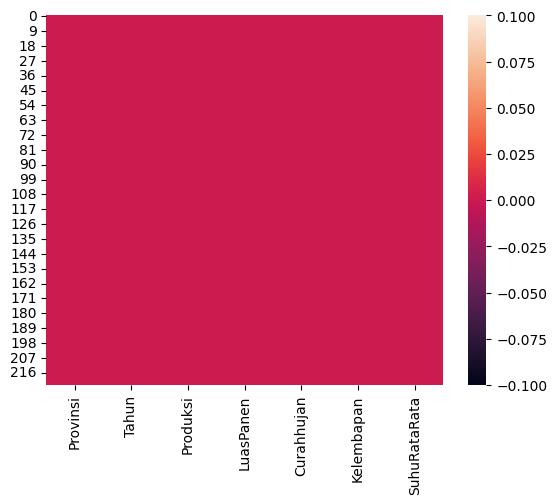

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.describe()

,Tahun,Produksi,LuasPanen,Curahhujan,Kelembapan,SuhuRataRata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


# Visualisasi Data

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_11744\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

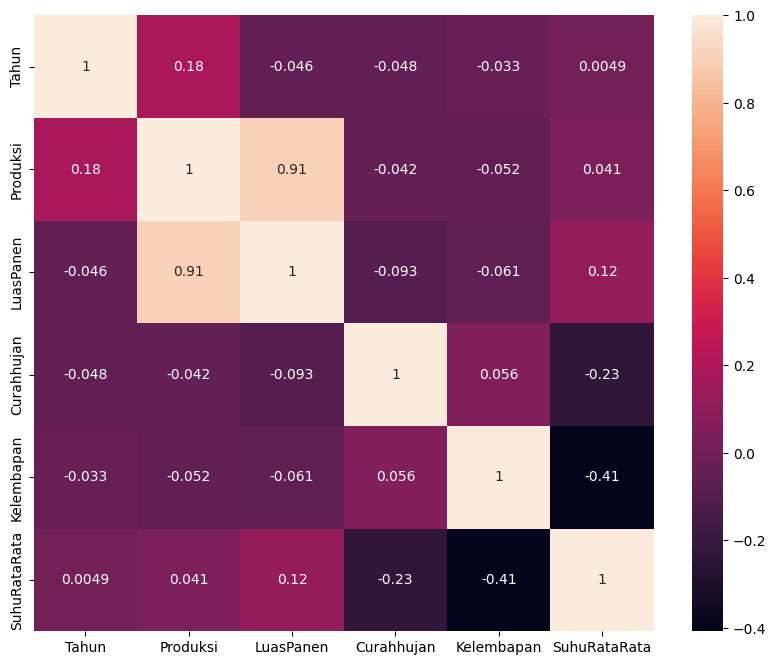

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# distribusi Curah Hujan

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_11744\2592960952.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Curahhujan'])


<Axes: xlabel='Curahhujan', ylabel='Density'>

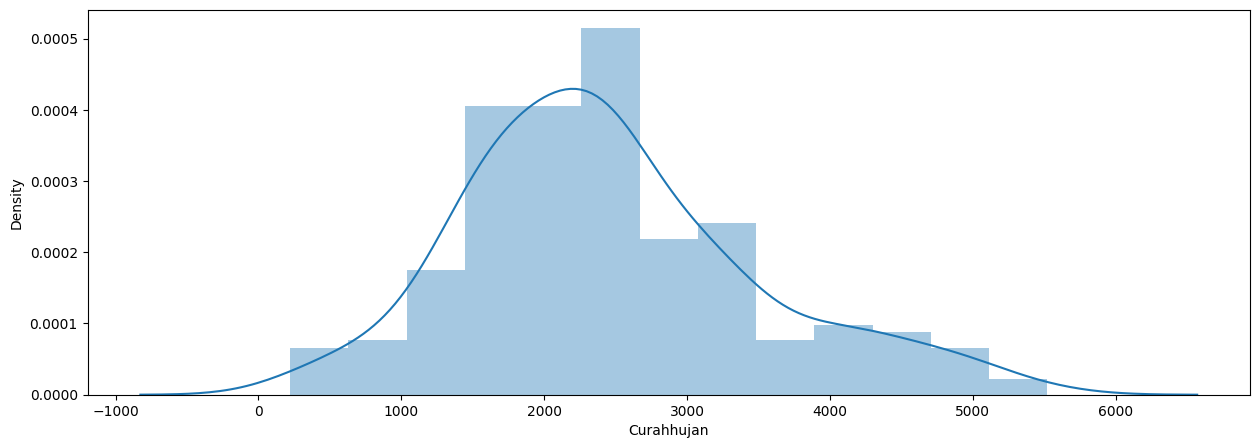

In [28]:
plt.figure(figsize=(15,5))
sns.distplot(df['Curahhujan'])

# distribusi Jumlah Produksi

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_11744\3257013812.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Produksi'])


<Axes: xlabel='Produksi', ylabel='Density'>

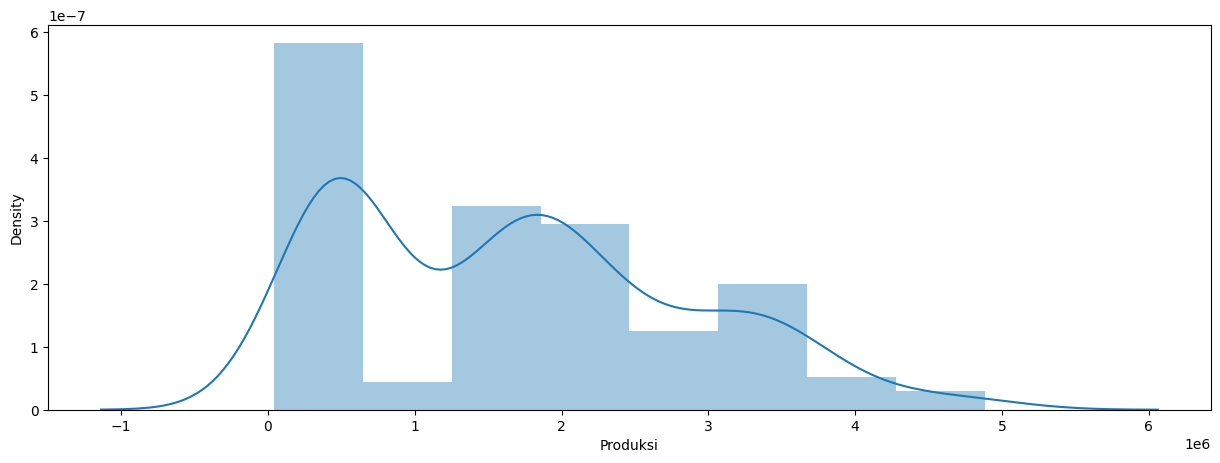

In [29]:
plt.figure(figsize=(15,5))
sns.distplot(df['Produksi'])

# seleksi fitur

In [31]:
features = ['LuasPanen','Curahhujan','Kelembapan','SuhuRataRata']
x = df[features]
y = df['Produksi']
x.shape, y.shape

((224, 4), (224,))

# split data training dan data testing

In [32]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(56,)

# membuat model regresi linier

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [34]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.8663623649914515


# membuat inputan model regresi linier

In [37]:
input_data = np.array([[323589,1627,82,26]])


prediction = lr.predict(input_data) 
print('Estimasi Jumlah Produksi :', prediction)

Estimasi Jumlah Produksi : [1445808.11716709]


c:\Users\Nurthariqa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [38]:
import pickle

filename = 'estimasi_produksi.sav'
pickle.dump(lr,open(filename,'wb'))